# Vamshikrishna_Narmula_DSFT8_MINIPROJECT-4(Time Series)

In [1]:
#importing required libraries
import numpy as np #mathematical operations
import pandas as pd # To operate the dataframes
import matplotlib.pyplot as plt # To visualize
import seaborn as sb #To visualize

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel('DS3_C6_S4_TimeSeries_Sales_Data_Project.xls',parse_dates=True)
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
#structure
dataset.shape

(9994, 21)

In [4]:
#dataset for the category of furniture
df = dataset[dataset.Category == 'Furniture']
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
df.shape

(2121, 21)

In [6]:
#datatypes
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

      * No null values in the dataset

In [8]:
for i in df:
    v=df[i].value_counts()
    print(v)

1       1
6714    1
6783    1
6780    1
6779    1
       ..
3337    1
3334    1
3324    1
3321    1
9991    1
Name: Row ID, Length: 2121, dtype: int64
US-2015-129007    4
CA-2017-100111    4
US-2017-162558    4
CA-2015-104346    4
US-2015-138121    4
                 ..
CA-2017-111556    1
CA-2016-157686    1
CA-2015-152891    1
CA-2015-110016    1
CA-2017-121258    1
Name: Order ID, Length: 1764, dtype: int64
2016-09-05    10
2016-12-01     9
2017-11-19     9
2017-10-30     9
2016-12-25     9
              ..
2015-10-30     1
2015-07-09     1
2016-09-09     1
2015-06-22     1
2014-01-21     1
Name: Order Date, Length: 889, dtype: int64
2017-12-06    10
2015-12-16    10
2017-10-24     9
2016-09-14     8
2016-09-22     8
              ..
2018-01-05     1
2017-07-15     1
2017-06-25     1
2015-01-08     1
2017-03-03     1
Name: Ship Date, Length: 960, dtype: int64
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: Ship Mode, dtype: int64
SV-

       * No special characters in the given dataset.

## Data Visualization - EDA

### 1.UNIVARIATE ANALYSIS

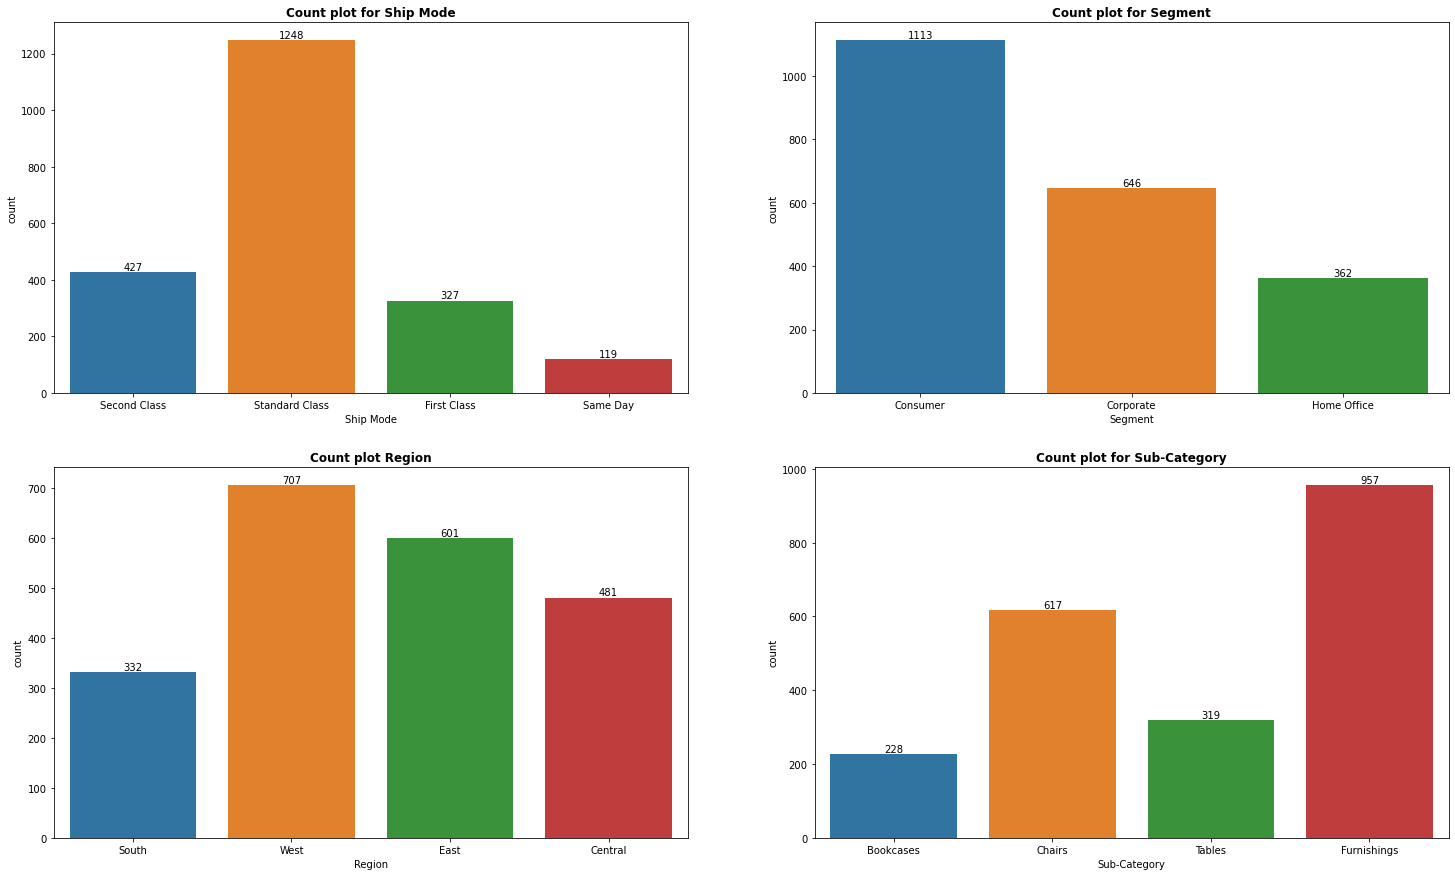

In [9]:
#Countplots for categorical features 'Ship Mode', 'Segment', 'Region', 'Sub-category'
plt.subplots(2,2,figsize=(25,15))

plt.subplot(221)
ax = sb.countplot(data=df,x='Ship Mode')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Count plot for Ship Mode',fontweight='bold')

plt.subplot(222)
ax1 = sb.countplot(data=df,x='Segment')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Count plot for Segment',fontweight='bold')

plt.subplot(223)
ax3 = sb.countplot(data=df,x='Region')
for container in ax3.containers:
    ax3.bar_label(container)
plt.title('Count plot Region',fontweight='bold')

plt.subplot(224)
ax4 = sb.countplot(data=df,x='Sub-Category')
for container in ax4.containers:
    ax4.bar_label(container)
plt.title('Count plot for Sub-Category',fontweight='bold')

plt.show()

## Interpretation:-
## In the Sales of Furniture
        * The mostly used Ship mode is 'Standard Class' followed by 'Second class'.
        * The highest segment the sales of furniture belongs to 'Consumer Segment'.
        * The most products of furniture are sold in the 'West region'.
        * The subcategory 'Furnishings' are mostly sold followed by 'Chairs'.

In [10]:
#min age
df['Sales'].min()

1.8920000000000003

In [11]:
#max age
df['Sales'].max()

4416.174

In [12]:
#creating bins for sales
b1 = [1,500,1000,1500,2000,2500,3000,3500,4000,4420]

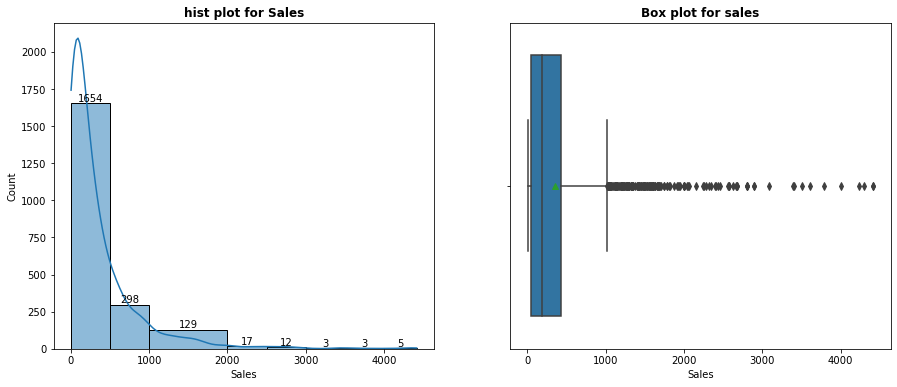

In [13]:
#Histplot for sales
plt.subplots(1,2,figsize=(15,6))

plt.subplot(121)
ax5 = sb.histplot(data=df['Sales'],bins=b1,kde=True)
for container in ax5.containers:
    ax5.bar_label(container)
plt.title('hist plot for Sales',fontweight='bold')

#boxplot for the feature sales
plt.subplot(122)
sb.boxplot(data=df, x='Sales', showmeans=True)
plt.title('Box plot for sales',fontweight='bold')
plt.show()

## Interpretation:-
         * The Sales are not distributed normally from the box plot we can see their are more outliers.
         * The mean is greater than median data is right skewed and the data is mostly towards the left.  

In [14]:
#min profit
df['Profit'].min()

-1862.3124000000003

In [15]:
#min profit
df['Profit'].max()

1013.1270000000001

In [16]:
#creating bins for profit
b2 = [-1865,-1500,-1000,-500,0,500,1020]

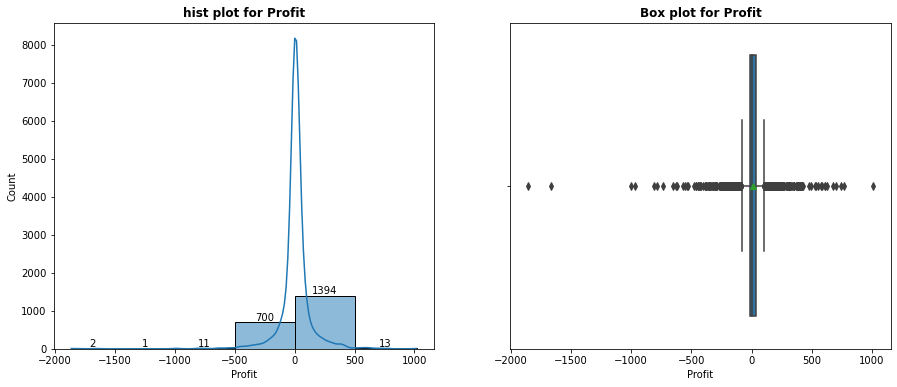

In [17]:
#Histplot for profit
plt.subplots(1,2,figsize=(15,6))

plt.subplot(121)
ax5 = sb.histplot(data=df['Profit'],bins=b2,kde=True)
for container in ax5.containers:
    ax5.bar_label(container)
plt.title('hist plot for Profit',fontweight='bold')

#boxplot for the feature profit
plt.subplot(122)
sb.boxplot(data=df, x='Profit', showmeans=True)
plt.title('Box plot for Profit',fontweight='bold')
plt.show()

## Interpretation:-
         * The profits are not distributed normally from the box plot we can see their are more outliers.
         * The mean is less than median data is left skewed and the data is mostly towards the right.  

## 2.BIVARIATE ANALYSIS

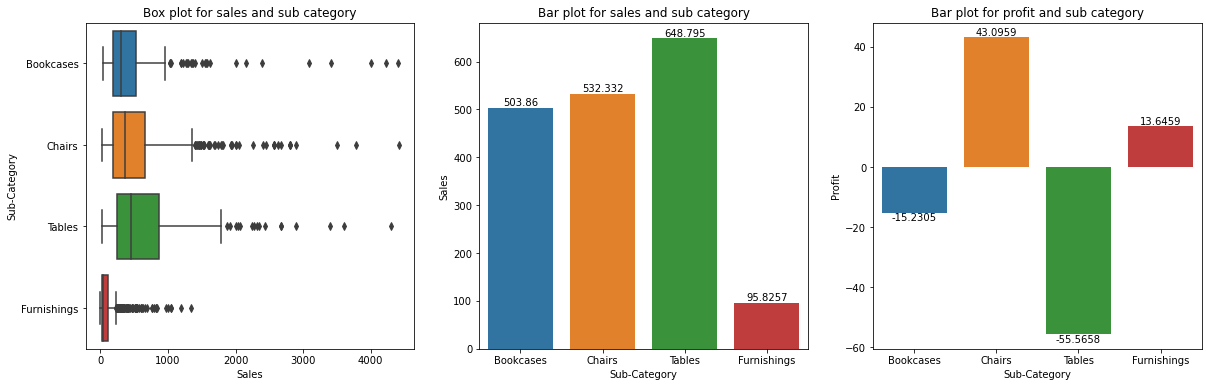

In [18]:
#Plot for the features sales and Sub-category
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sb.boxplot(data=df, x='Sales', y='Sub-Category')
plt.title('Box plot for sales and sub category')

plt.subplot(132)
ax=sb.barplot(data=df, y='Sales', x='Sub-Category',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and sub category')

plt.subplot(133)
ax=sb.barplot(data=df, y='Profit', x='Sub-Category',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and sub category')
plt.show()

## Interpretation:- For sub-Category
        * The Sales of 'Tables' are highest compared to others but these products are not profitable they are in losses.
        * The Sales of 'Chairs' are second highest and the 'profits' are highest compared to other sub category products.
        * The Sales of 'Bookcases' are third highest but not profitable they are in losses.
        * The Sales of 'furnishings' are least but these sub category products are profitable.       

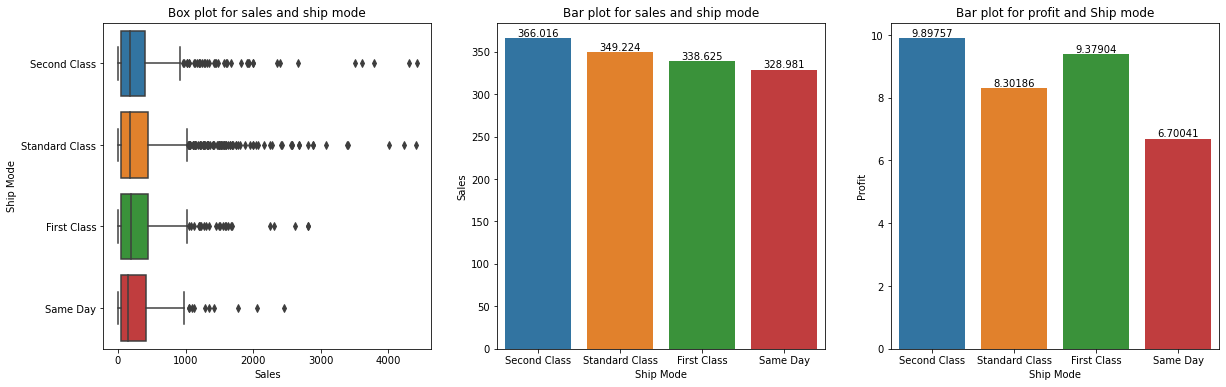

In [19]:
#Plot for the features sales and Ship Mode
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sb.boxplot(data=df, x='Sales', y='Ship Mode')
plt.title('Box plot for sales and ship mode')

plt.subplot(132)
ax=sb.barplot(data=df, y='Sales', x='Ship Mode',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and ship mode')

plt.subplot(133)
ax=sb.barplot(data=df, y='Profit', x='Ship Mode',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and Ship mode')
plt.show()

## Interpretation:- For Ship Mode
        * The Sales and the profits of the  'Second Class' ship mode are highest compared to other ship modes.
        * The Sales 'Standard Class' are second highest and the 'profits' are more compared to 'Same day' ship mode.
        * The Sales of 'First Class' are third highest but the profits are more than 'Standard class' and 
        less than 'Second Class'.
        * The Sales and profits of 'Same Day' ship mode are least.       

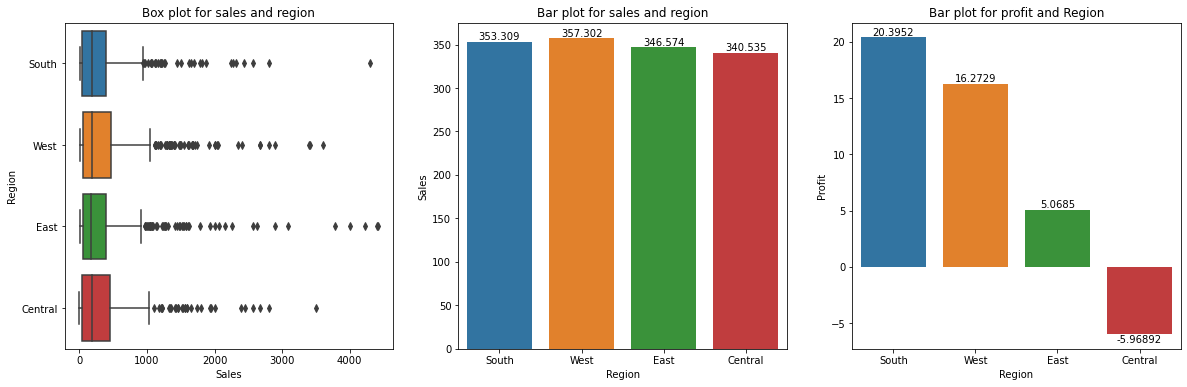

In [20]:
#Plot for the features sales and Region
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sb.boxplot(data=df, x='Sales', y='Region')
plt.title('Box plot for sales and region')

plt.subplot(132)
ax=sb.barplot(data=df, y='Sales', x='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and region')

plt.subplot(133)
ax=sb.barplot(data=df, y='Profit', x='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and Region')
plt.show()

## Interpretation:- For region
        * The Sales are Highest in the 'West Region' but the profits are less compared to 'South region'.
        * The Sales in 'South Region' are second highest and the 'profits' are highest compared to other regions.
        * The Sales in 'East Region' are third highest but profits are less than South and West regions.
        * The Sales in 'Central Region' are least and in these region products are not profitable.       

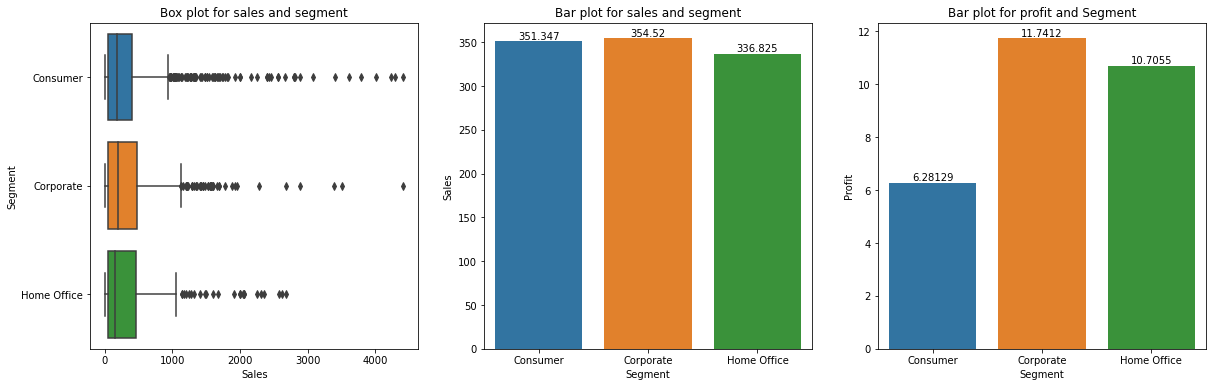

In [21]:
#Plot for the features sales and segment
plt.subplots(1,3,figsize=(20,6))

plt.subplot(131)
sb.boxplot(data=df, x='Sales', y='Segment')
plt.title('Box plot for sales and segment')

plt.subplot(132)
ax=sb.barplot(data=df, y='Sales', x='Segment',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for sales and segment')

plt.subplot(133)
ax=sb.barplot(data=df, y='Profit', x='Segment',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for profit and Segment')
plt.show()

## Interpretation:- For Segment
        * The Sales and profits are highest in 'Corporate Segment' compared to other segments.
        * In 'Consumer Segment' the Sales are second highest but the profits are least compared to other segments.
        * The Sales are least in 'Home Office' but the profits are more compared to 'Consumer Segment' and 
        less compared to 'Corporate segment'.     

## 3.MULTIVARIATE ANALYSIS

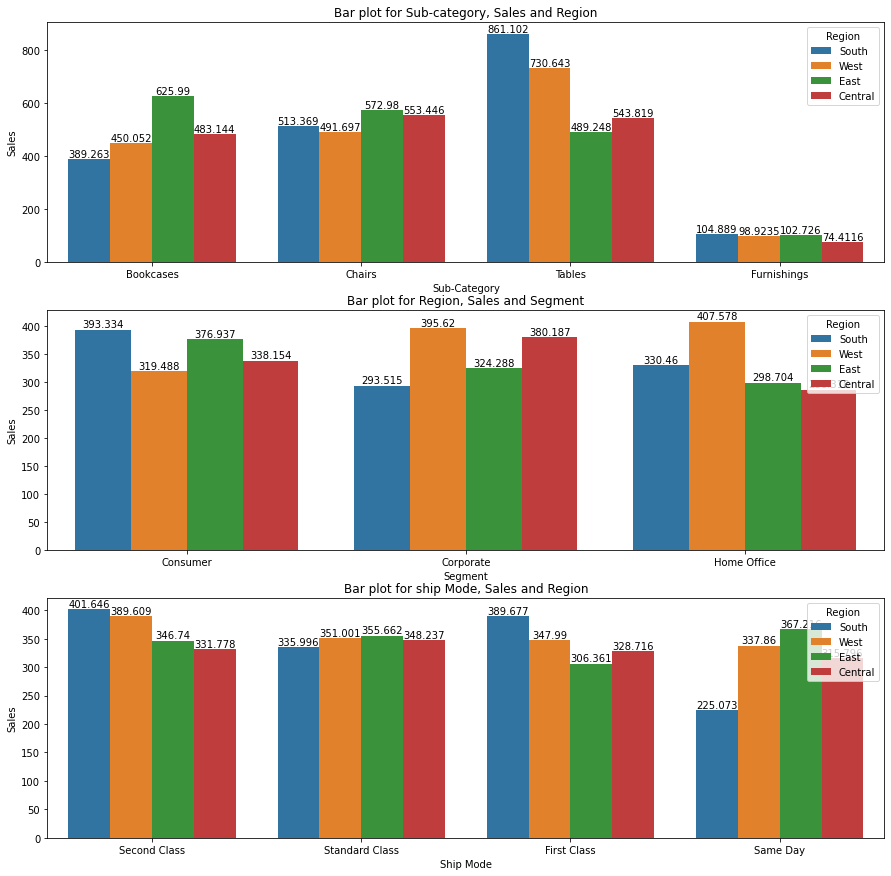

In [22]:
plt.subplots(3,1,figsize=(15,15))

plt.subplot(311)
ax=sb.barplot(data=df, x='Sub-Category', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Sales and Region')

plt.subplot(312)
ax=sb.barplot(data=df, x='Segment', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Region, Sales and Segment')

plt.subplot(313)
ax=sb.barplot(data=df, x='Ship Mode', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for ship Mode, Sales and Region')
plt.show()

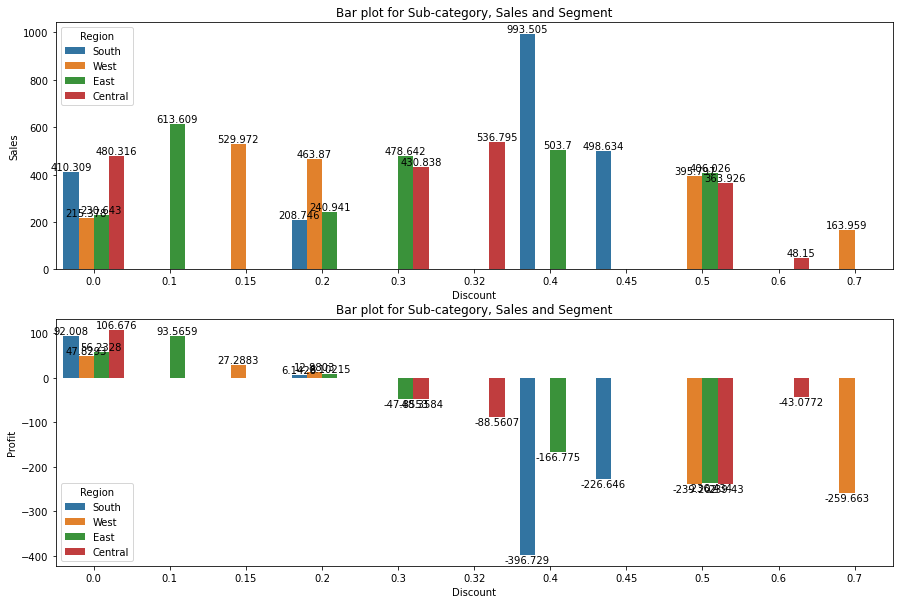

In [23]:
plt.subplots(2,2,figsize=(15,10))

plt.subplot(211)
ax=sb.barplot(data=df, x='Discount', y='Sales',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Sales and Segment')

plt.subplot(212)
ax=sb.barplot(data=df, x='Discount', y='Profit',hue='Region',ci=None)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Bar plot for Sub-category, Sales and Segment')

plt.show()

## Interpretation:-
         * There are losses for the products if the discount is more than 0.2 in all the regions.

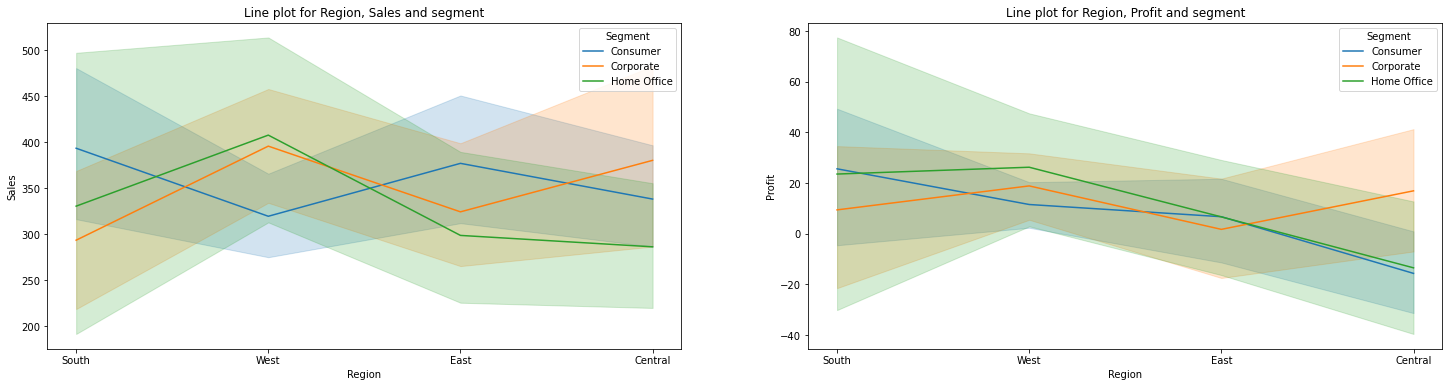

In [24]:
plt.subplots(1,2,figsize=(25,6))

plt.subplot(121)
sb.lineplot(data=df,x='Region',y='Sales',hue='Segment')
plt.title('Line plot for Region, Sales and segment')

plt.subplot(122)
sb.lineplot(data=df,x='Region',y='Profit',hue='Segment')
plt.title('Line plot for Region, Profit and segment')
plt.show()

## Interpretation:-
      * For 'Home Office Segment' the Sales and profits are highest in the 'West Region' and least in 'Central region'.
      * For 'Corporate Segment' the Sales are highest in 'West region' and least in 'South region' and profits are 
      highest in 'Central region' and least in 'East region'.
      * For 'Consumer Segment' the Sales are highest in 'south region' and least in 'West region' and profits are 
      highest in 'South region' and least in 'Central region'.

# Data Preprocessing

In [25]:
#df1 = df.groupby('Order Date')['Sales'].sum().reset_index()

In [26]:
df1 = df[['Order Date','Sales']]

In [27]:
# setting the index as Order Date
df1 = df1.set_index('Order Date')
df1.head(3)

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775


In [28]:
# separting the required features to another datset d
d = df1[['Sales']]
d.head(3)

,Sales
Order Date,
2016-11-08,261.9600
2016-11-08,731.9400
2015-10-11,957.5775


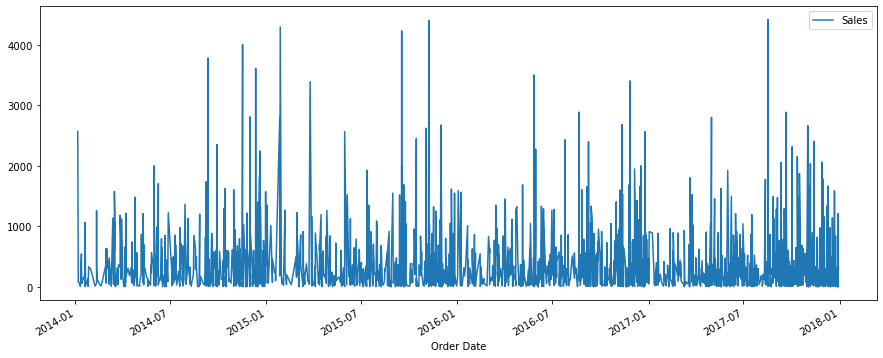

In [29]:
#plotting the sales with orderdate
d.plot(figsize=(15,6))
plt.show()

In [30]:
#resampling the data to weekly data using the mean function
df2 = df1.resample('W').mean()
df2.head()

,Sales
Order Date,
2014-01-12,678.107000
2014-01-19,250.094600
2014-01-26,183.995333
2014-02-02,311.833000
2014-02-09,14.560000


In [31]:
#check for structure after resampling
df2.shape

(208, 1)

In [32]:
#check for null values
df2.isnull().sum()

Sales    0
dtype: int64

       * No null values after resampling the data to weekly data

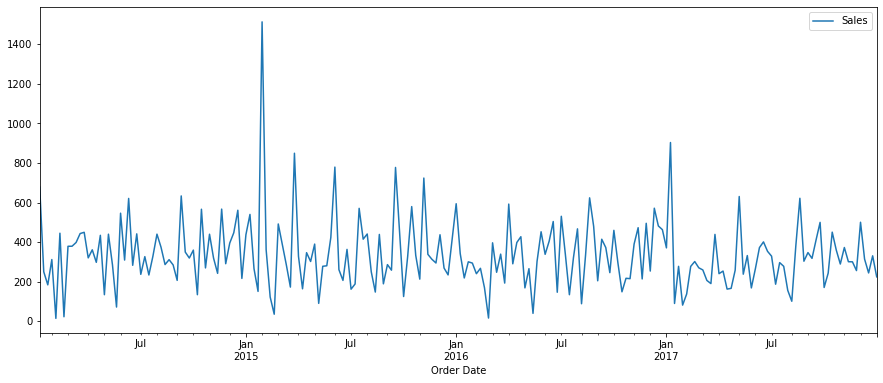

In [33]:
#plotting the sales with orderdate after resampling to weekly data
df2.plot(figsize=(15,6))
plt.show()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
decomp1 = seasonal_decompose(df2,period=7)

In [36]:
d_trend = decomp1.trend
d_seasonal = decomp1.seasonal
d_residual = decomp1.resid

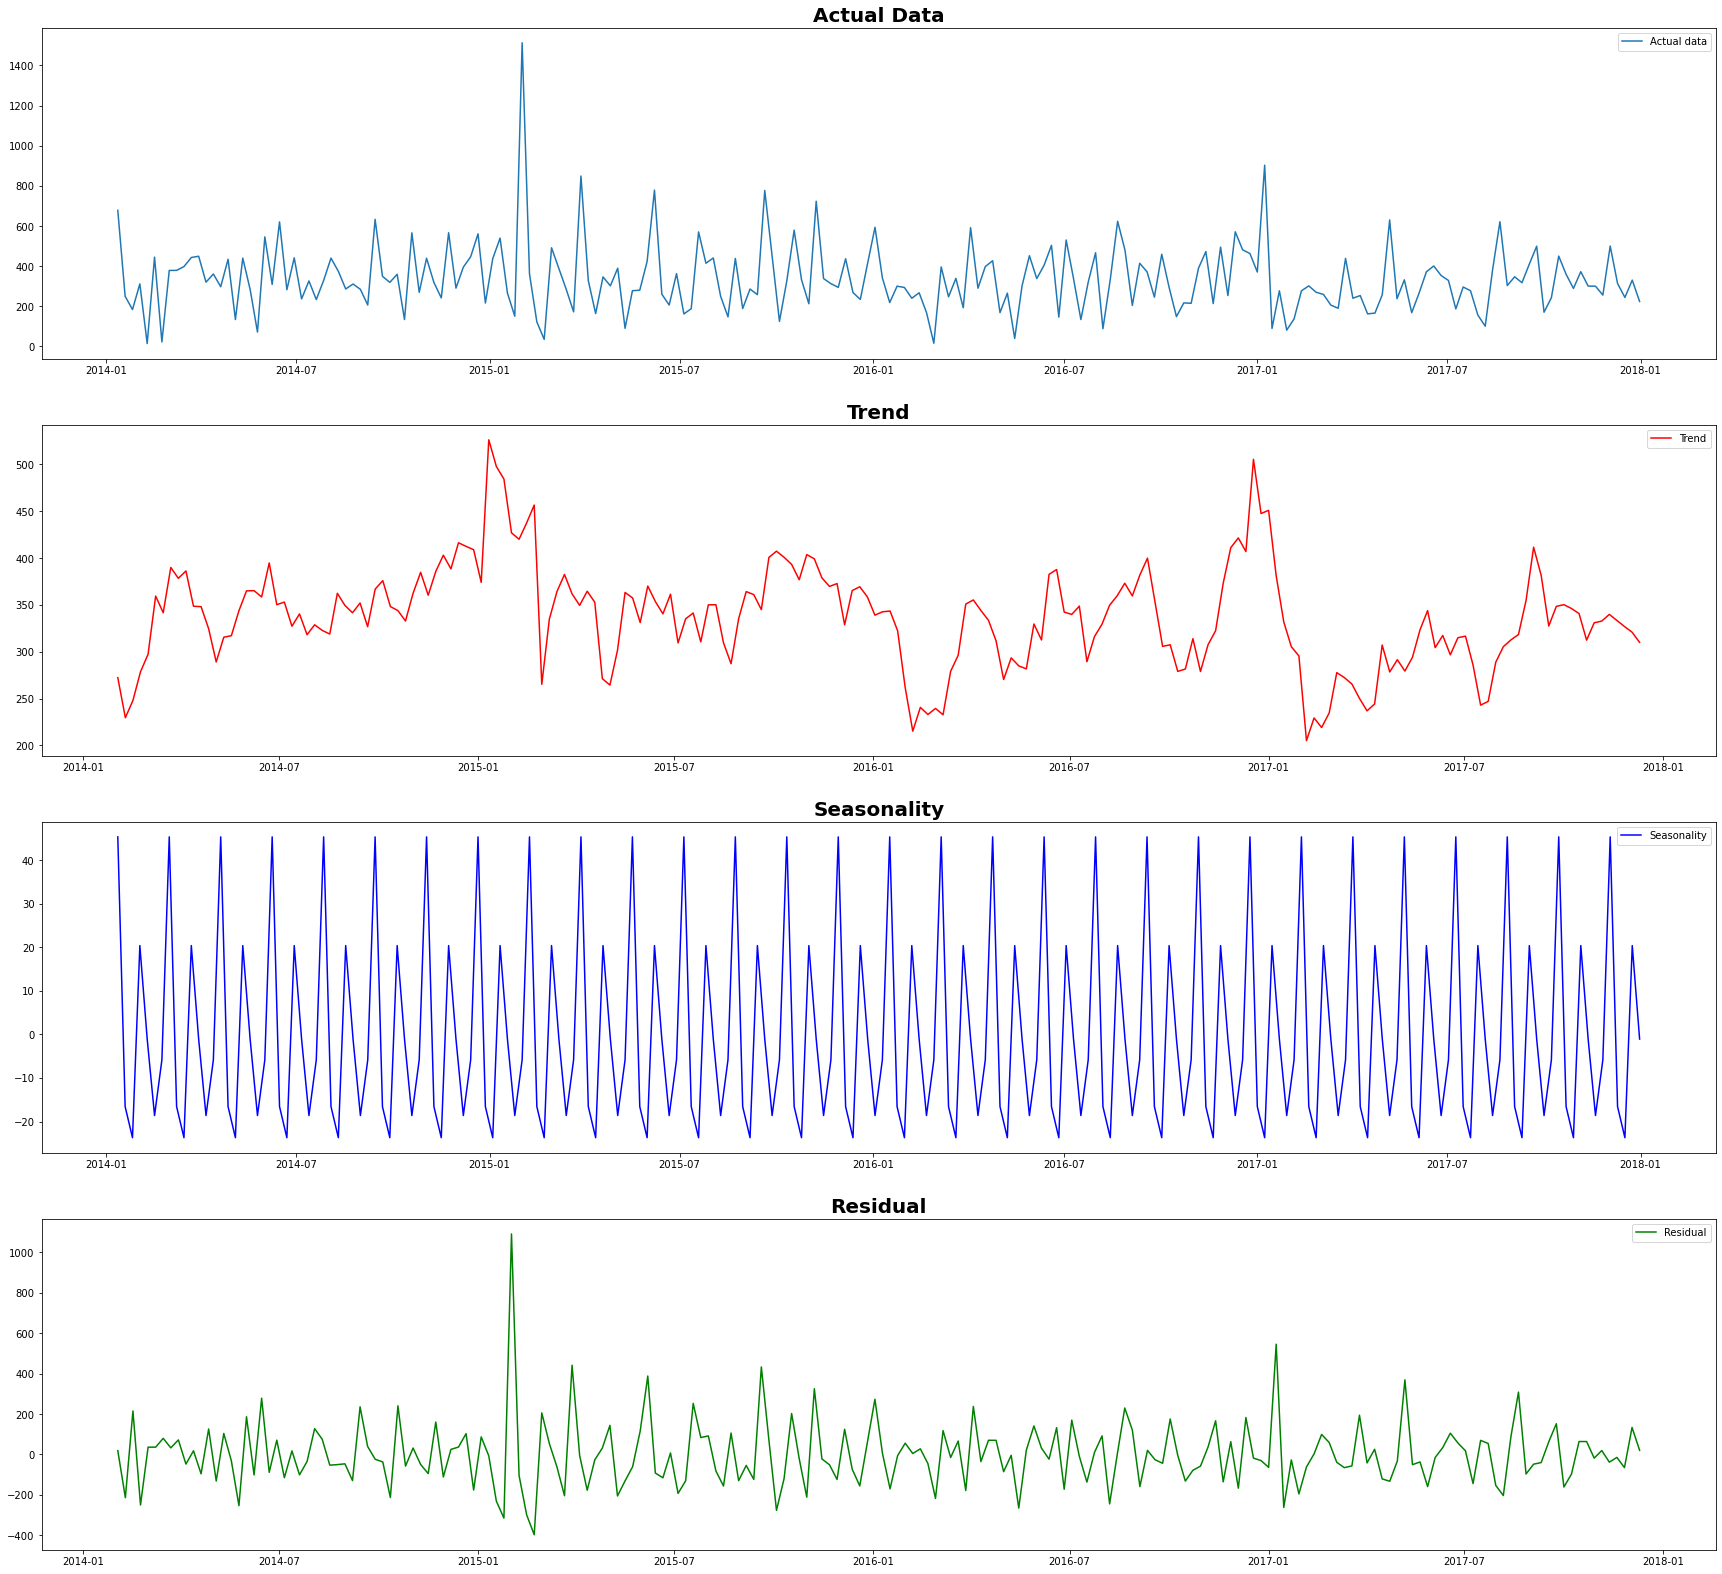

In [37]:
#plots for seasonal components
plt.subplots(4,1,figsize=(30,28))

plt.subplot(411)
plt.plot(df2['Sales'],label='Actual data')
plt.title('Actual Data',fontweight='bold',size=20)
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,color='r',label='Trend')
plt.title('Trend',fontweight='bold',size=20)
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,color='b',label='Seasonality')
plt.title('Seasonality',fontweight='bold',size=20)
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,color='g',label='Residual')
plt.title('Residual',fontweight='bold',size=20)
plt.legend(loc='best')
plt.show()

## Interpretation:-
          * From the graph-1 we can see the actual data in which trend,seasonality and noise are present.
          * From graph-2 we can see the upward trend.
          * From graph-3 we can see the Seasonality present in the data.
          * from graph-4 we can see the presence of noise in the data.

In [38]:
#moving average

lags = [3,6,9,12]
moving_av = []
for i in lags:
    moving_avg = df2.rolling(window=i).mean()
    moving_av.append(moving_avg)

In [39]:
#creating a dataframe for assigning the actual data and moving averages
df3 = pd.DataFrame()

df3['Actual_data'] = df2
df3['Moving_average3'] = moving_av[0]
df3['Moving_average6'] = moving_av[1]
df3['Moving_average9'] = moving_av[2]
df3['Moving_average12'] = moving_av[3]

In [40]:
df3.head()

,Actual_data,Moving_average3,Moving_average6,Moving_average9,Moving_average12
Order Date,,,,,
2014-01-12,678.107000,NaN,NaN,NaN,NaN
2014-01-19,250.094600,NaN,NaN,NaN,NaN
2014-01-26,183.995333,370.732311,NaN,NaN,NaN
2014-02-02,311.833000,248.640978,NaN,NaN,NaN
2014-02-09,14.560000,170.129444,NaN,NaN,NaN


<Figure size 1080x432 with 0 Axes>

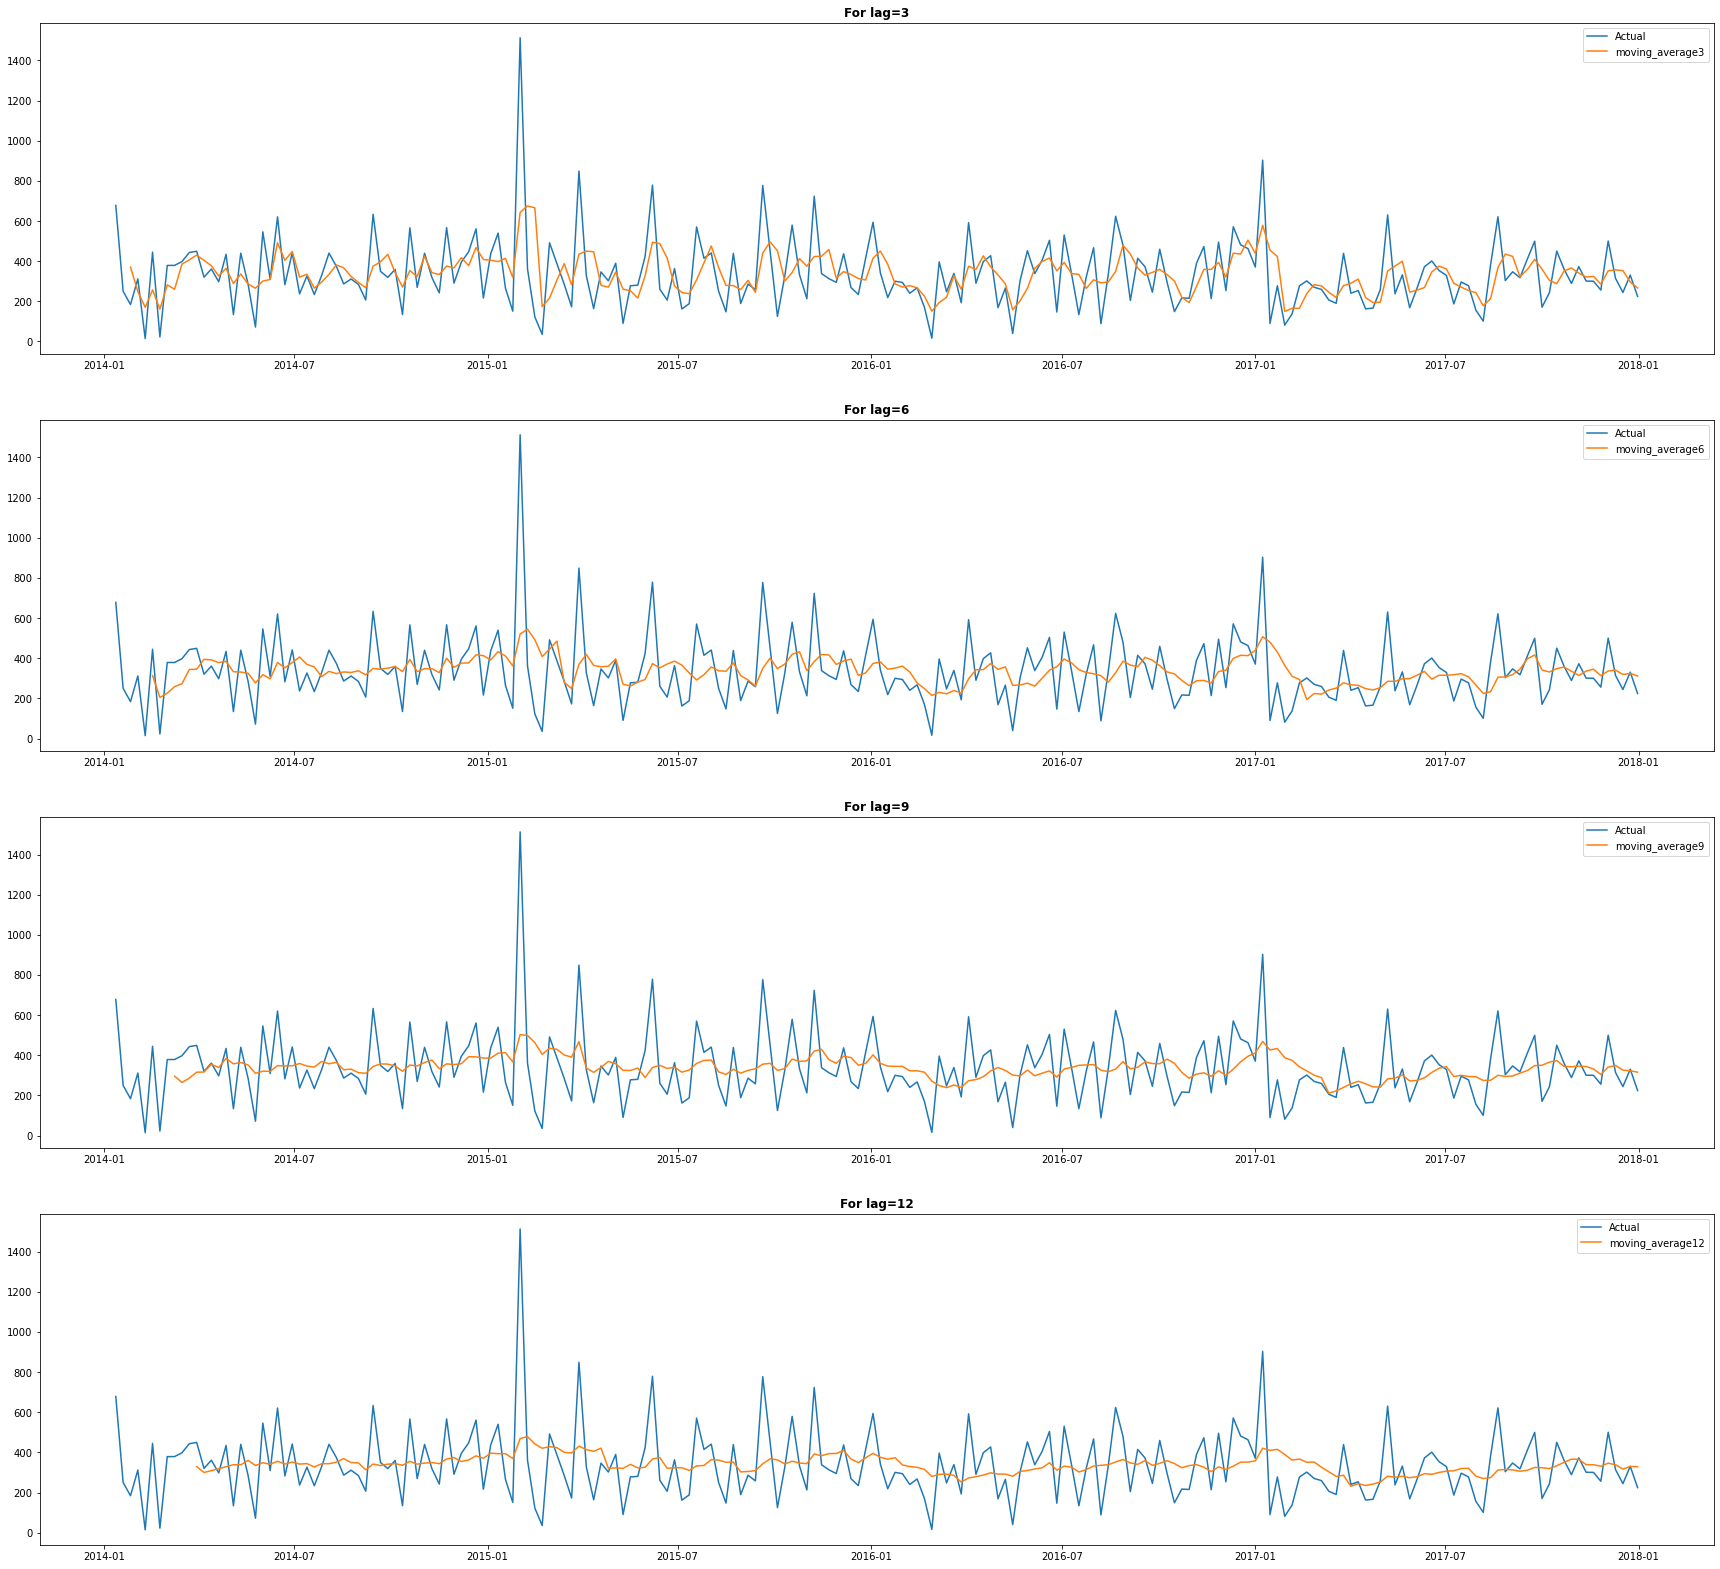

In [41]:
#plotting for actual and different lags
plt.figure(figsize=(15,6))
fig,ax=plt.subplots(4,1,figsize=(30,28))

plt.subplot(411)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average3'],label='moving_average3')
plt.title('For lag=3',fontweight='bold', size=12)
plt.legend(loc='best')


plt.subplot(412)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average6'],label='moving_average6')
plt.title('For lag=6',fontweight='bold', size=12)
plt.legend(loc='best')


plt.subplot(413)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average9'],label='moving_average9')
plt.title('For lag=9',fontweight='bold', size=12)
plt.legend(loc='best')


plt.subplot(414)
plt.plot(df3['Actual_data'],label='Actual')
plt.plot(df3['Moving_average12'],label='moving_average12')
plt.title('For lag=12',fontweight='bold', size=12)
plt.legend(loc='best')

plt.show()

In [42]:
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [43]:
data = df2['Sales']
data

Order Date
2014-01-12    678.107000
2014-01-19    250.094600
2014-01-26    183.995333
2014-02-02    311.833000
2014-02-09     14.560000
                 ...    
2017-12-03    500.255375
2017-12-10    314.085857
2017-12-17    244.201000
2017-12-24    330.638318
2017-12-31    224.309156
Freq: W-SUN, Name: Sales, Length: 208, dtype: float64

In [44]:
def simplesmoothening(data,alpha):
    model=SimpleExpSmoothing(data).fit(smoothing_level=alpha)
    fcast = model.fittedvalues
    d1=pd.DataFrame({'Actual':data,'Forecast':fcast})
    return(model,d1)

In [45]:
#smoothening parameter ---> alpha
alphas = [0.0,0.2,0.4,0.6,0.8]
d_simple_exp = {}  #stores forecasted values for a given alpha
models = []

In [46]:
for a in alphas:
    m,d = simplesmoothening(df2['Sales'],a)
    d_simple_exp[a]=d.Forecast
    models.append(m)

<Figure size 1080x432 with 0 Axes>

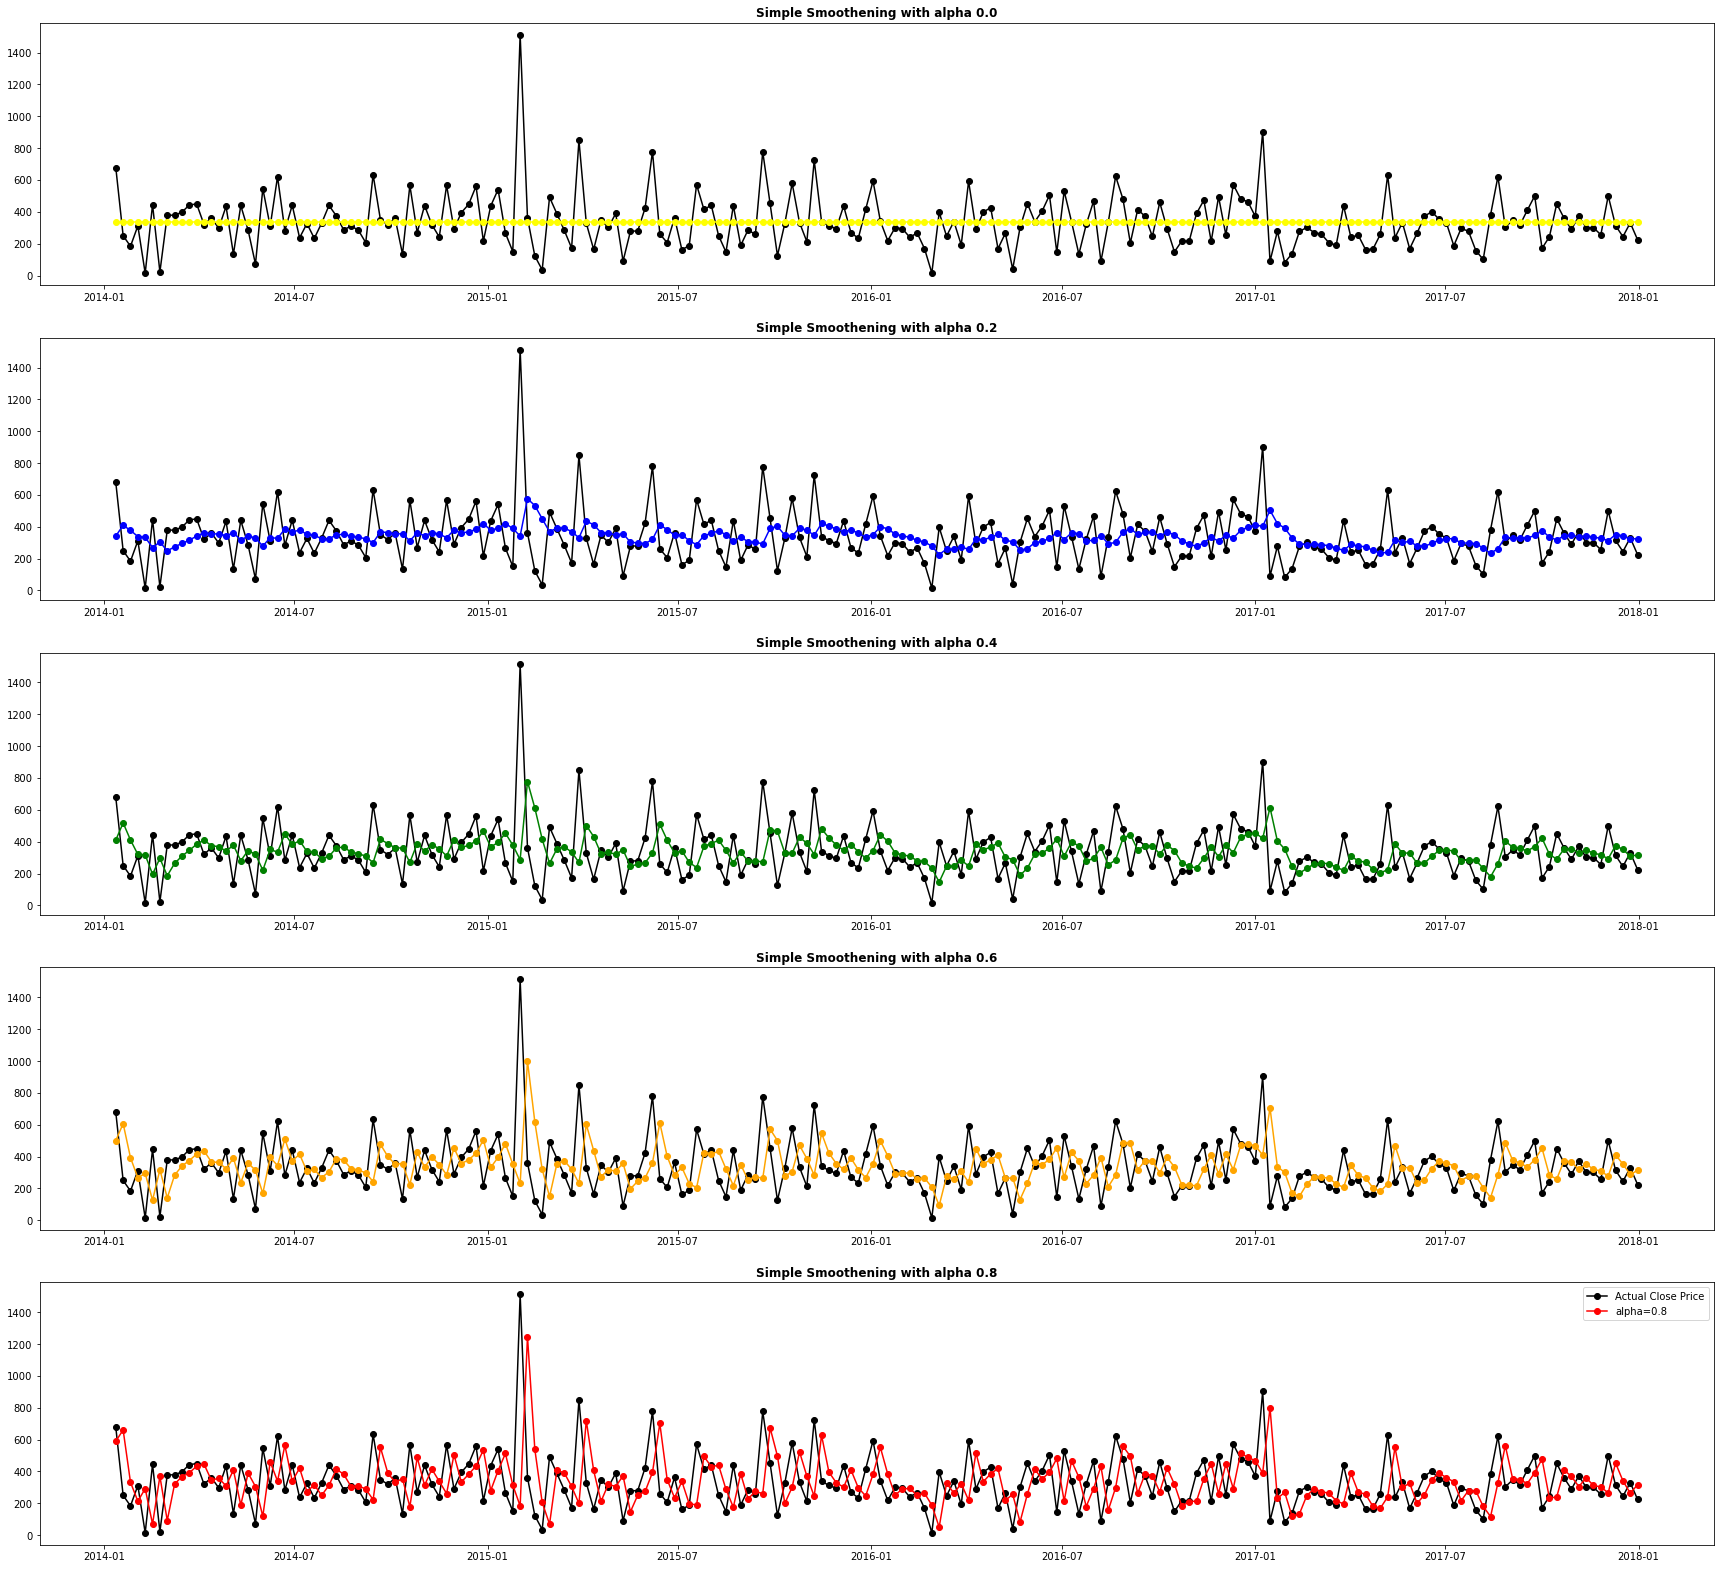

In [47]:
plt.figure(figsize=(15,6))
fig,ax=plt.subplots(5,1,figsize=(30,28))

plt.subplot(511)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.0), marker='o', color='yellow',label='alpha=0.0')
plt.title('Simple Smoothening with alpha 0.0',fontweight='bold', size=12)

plt.subplot(512)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.2), marker='o', color='blue',label='alpha=0.2')
plt.title('Simple Smoothening with alpha 0.2',fontweight='bold', size=12)

plt.subplot(513)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.4), marker='o', color='green',label='alpha=0.4')
plt.title('Simple Smoothening with alpha 0.4',fontweight='bold', size=12)

plt.subplot(514)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.6), marker='o', color='orange',label='alpha=0.6')
plt.title('Simple Smoothening with alpha 0.6',fontweight='bold', size=12)

plt.subplot(515)
plt.plot(data, marker='o', color='black',label='Actual Close Price')
plt.plot(d_simple_exp.get(0.8), marker='o', color='red',label='alpha=0.8')
plt.title('Simple Smoothening with alpha 0.8',fontweight='bold', size=12)


plt.legend(loc='best')
plt.show()

## Interpretation:-
    * Here in Simple Exponential smoothening we can see that for the alpha value of 0.2, 
    the forecast line gets smoothened.

In [48]:
# For calculating errors
model=SimpleExpSmoothing(data).fit(smoothing_level=0.2)
fcast_se = model.fittedvalues

In [49]:
from sklearn.metrics import mean_squared_error
rmse_se = mean_squared_error(data,fcast_se,squared=False)
rmse_se

185.64325755279077

#### 2.Double Exponential

In [50]:
# Double exponential Smoothing
alpha = 0.2; beta = 0.35

In [51]:
model1 = ExponentialSmoothing(data,trend='Additive').fit(smoothing_level=alpha, smoothing_trend=beta)

In [52]:
# forecast
fcast_de = model1.fittedvalues

Text(0.5, 1.0, 'Double Exponent Smoothing')

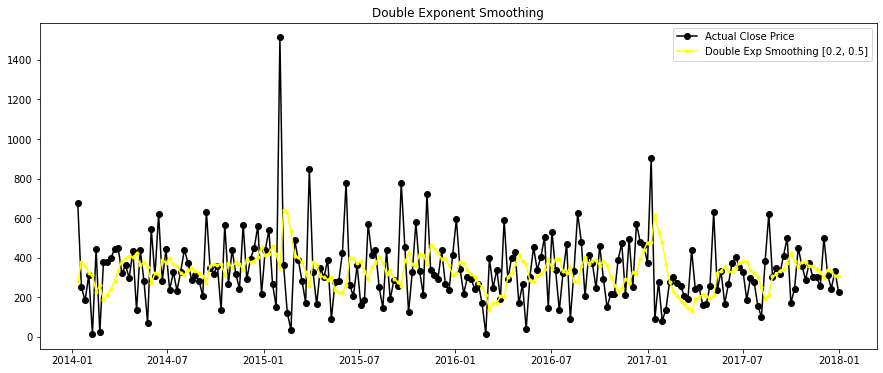

In [53]:
#plot the original and smoothened data

plt.figure(figsize=(15,6))
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(fcast_de, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [54]:
rmse_de = mean_squared_error(data,fcast_de,squared=False)
rmse_de

199.59717558410682

## 3.Triple Exponential Smoothening

In [55]:
## Triple Exponential Smoothing (tes)
alpha = 0.2; beta = 0.35; gama =0.5

In [56]:
model_tes = ExponentialSmoothing(data, trend='additive', seasonal='additive',seasonal_periods=7).fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gama)

In [57]:
#forecast
fcast_tes=model_tes.fittedvalues
fcast_tes

Order Date
2014-01-12    517.665264
2014-01-19    354.047161
2014-01-26    233.476021
2014-02-02    327.930311
2014-02-09     92.164554
                 ...    
2017-12-03    362.440579
2017-12-10    343.507612
2017-12-17    289.756530
2017-12-24    332.078639
2017-12-31    299.243832
Freq: W-SUN, Length: 208, dtype: float64

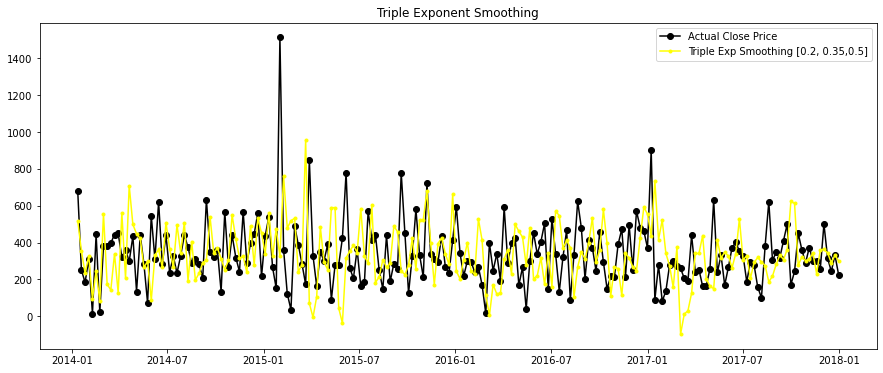

In [58]:
#plot
plt.figure(figsize=(15,6))
plt.plot(data,marker='o',color='black',label='Actual Close Price')
plt.plot(fcast_tes, marker='.',color='yellow',label='Triple Exp Smoothing [0.2, 0.35,0.5]')

plt.legend()
plt.title('Triple Exponent Smoothing')
plt.show()

In [59]:
rmse_tes = mean_squared_error(data,fcast_tes,squared=False)
rmse_tes

238.8665504103795

## Checking for stationarity

In [60]:
# Checking for stationarity
from statsmodels.tsa.stattools import adfuller
def checkstationarity(data):
    pvalue = adfuller(data)[1]
    print(pvalue)
    
    if pvalue < 0.05:
        ret = 'Data is Stationary. Proceed to model building'
    else:
        ret = 'Data is not stationary. Make data stationary and proceed to model building'
        
    return(ret)

In [61]:
checkstationarity(df2)

8.124101346205066e-22


'Data is Stationary. Proceed to model building'

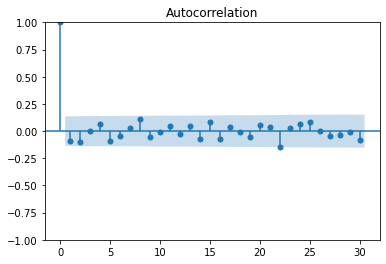

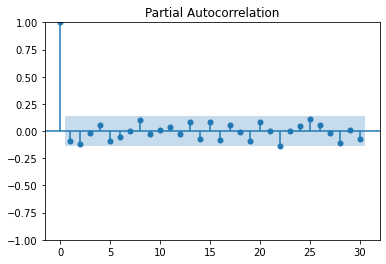

In [62]:
# plotting acf and pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_acf(df2,lags=30)
plot_pacf(df2,lags=30)
plt.show()

In [63]:
p=3;q=4

In [64]:
#splitting the data
num = int(0.7*len(df2))

train = df2.iloc[:num]
test = df2.iloc[num:]

train.shape,test.shape

((145, 1), (63, 1))

In [65]:
#checking for best p,d and q values by building arima model
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def arima_model(data):
    list1 = []
    for p in range(2):
        for q in range(2):
            list1.append((p,0,q))
            
    model = []
    for i in list1:
        m=ARIMA(train,order=i).fit()
        model.append(m)
        
    aic=[]
    bic=[]
    for j in model[0:]:
        aic.append(j.aic)
        bic.append(j.bic)
                
    forecast = []
    for v in model:
        f=v.predict(0,len(test)-1)
        forecast.append(f)
                    
    RMSE=[]
    for a in forecast[0:]:
        rmse = mean_squared_error(test,a,squared=False)
        RMSE.append(round(rmse,3))
        
        
    
    v1 = pd.DataFrame({'model':model,'p,d,q':list1,'RMSE':RMSE,'AIC':aic,'BIC':bic})
    
        
    return(v1)

    

In [66]:
dff = arima_model(train)
dff

,model,"p,d,q",RMSE,AIC,BIC
0,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 0)",145.265,1928.240281,1934.193749
1,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(0, 0, 1)",143.753,1925.947630,1934.877831
2,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(1, 0, 0)",142.874,1927.436320,1936.366522
3,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(1, 0, 1)",143.134,1925.390514,1937.297449


In [67]:
dff['RMSE'].min()

142.874

In [68]:
dff[dff.RMSE == dff['RMSE'].min()]

,model,"p,d,q",RMSE,AIC,BIC
2,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,"(1, 0, 0)",142.874,1927.43632,1936.366522


In [69]:
from pmdarima.arima import auto_arima

In [70]:
stepwise_fit = auto_arima(df2['Sales'],start_p=0,max_p=3,start_q=0,max_q=4,trace=True,seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=2738.479, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2738.566, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2738.023, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3061.955, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2741.195, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=2737.954, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2740.230, Time=0.10 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=2739.946, Time=0.13 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=2741.794, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2934.784, Time=0.07 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.715 seconds


## Model Building

### 1.ARMA MODEL

In [71]:
def arima_func(data,p,d,q):
    
    m1 = ARIMA(data,order=(p,d,q)).fit()
    predictions = m1.predict(len(train),len(train)+len(test)-1)
    
    return m1.summary(),predictions

In [72]:
summary_arma, pred_arma = arima_func(train,1,0,0)

In [73]:
summary_arma

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  145
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -960.718
Date:                Sun, 13 Nov 2022   AIC                           1927.436
Time:                        09:26:28   BIC                           1936.367
Sample:                    01-12-2014   HQIC                          1931.065
                         - 10-16-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        345.0579     16.196     21.305      0.000     313.315     376.801
ar.L1         -0.1400      0.106     -1.327      0.184      -0.347       0.067
sigma2       3.33e+04   2189.840     15.207      0.000     2.9e+04    3.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               613.16
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.86
Prob(H) (two-sided):                  0.89   Kurtosis:                        12.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
pred_arma

2016-10-23    372.539911
2016-10-30    341.209339
2016-11-06    345.596891
2016-11-13    344.982456
2016-11-20    345.068501
                 ...    
2017-12-03    345.057932
2017-12-10    345.057932
2017-12-17    345.057932
2017-12-24    345.057932
2017-12-31    345.057932
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

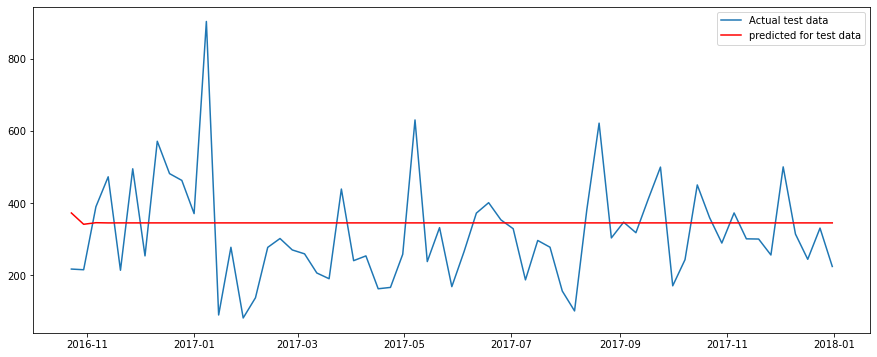

In [75]:
plt.figure(figsize=(15,6))

plt.plot(test['Sales'],label='Actual test data')
plt.plot(pred_arma,'r',label='predicted for test data')
plt.legend(loc='best')
plt.show()

In [76]:
#forecasting for next 1year
model1 = ARIMA(train,order=(1,0,0)).fit()

fcast_arma = model1.predict(len(df2),len(df2)+52,type='levels')

In [77]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model1.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [78]:
if pvalue <0.05:
    print('not good')
else:
    print('good')

good


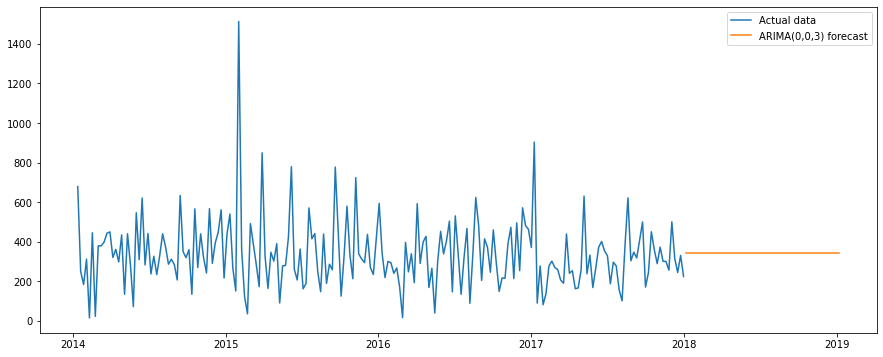

In [79]:
plt.figure(figsize=(15,6))

plt.plot(df2.Sales,label='Actual data')
plt.plot(fcast_arma,label='ARIMA(0,0,3) forecast')
plt.legend(loc='best')
plt.show()

In [80]:
AIC_ARMA = 2234.074
BIC_ARMA = 2248.958

In [81]:
AIC_ARMA = model1.aic
BIC_ARMA = model1.bic
AIC_ARMA,BIC_ARMA

(1927.4363203564249, 1936.3665215836866)

In [82]:
# Evaluation of data
from sklearn.metrics import mean_squared_error

mse_arma = mean_squared_error(test.Sales,pred_arma)
rmse_arma = mean_squared_error(test.Sales,pred_arma,squared=False)

print(mse_arma)
print(rmse_arma)

21205.460409117564
145.62094770024527


### 2.SARIMA MODEL

In [83]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [116]:
model2 = SARIMAX(train,order=(1,0,0),seasonal_order=(1,0,0,7)).fit()

In [117]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model2.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [118]:
if pvalue <0.05:
    print('not good')
else:
    print('good')

good


In [119]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood               -1000.187
Date:                           Sun, 13 Nov 2022   AIC                           2006.373
Time:                                   09:27:40   BIC                           2015.303
Sample:                               01-12-2014   HQIC                          2010.002
                                    - 10-16-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0567      0.084     -0.676      0.499      -0.221       0.108
ar.S.L7        0.8113      0.029     27.585      0.000       0.754       0.869
sigma2       5.45e+04   3804.729     14.324      0.000     4.7e+04     6.2e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.03   Jarque-Bera (JB):               264.94
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.09   Skew:                            -0.12
Prob(H) (two-sided):                  0.77   Kurtosis:                         9.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [120]:
AIC_SARIMA=model2.aic
BIC_SARIMA=model2.bic
AIC_SARIMA,BIC_SARIMA

(2006.3731819315196, 2015.3033831587813)

In [121]:
pred_sarima = model2.predict(test.index[0],test.index[-1])
pred_sarima

2016-10-23    179.521190
2016-10-30    335.478820
2016-11-06    302.011277
2016-11-13    199.268246
2016-11-20    372.706062
                 ...    
2017-12-03     56.660778
2017-12-10     37.385008
2017-12-17     69.923931
2017-12-24     44.852799
2017-12-31     22.649755
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

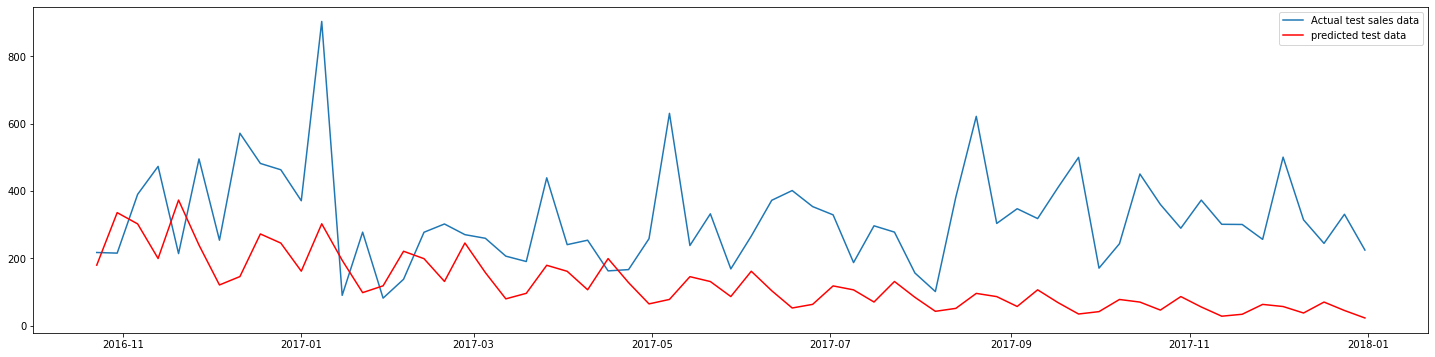

In [122]:
plt.figure(figsize=(25,6))

plt.plot(test.Sales,label='Actual test sales data')
plt.plot(pred_sarima,'r',label='predicted test data')
plt.legend(loc='best')
plt.show()

In [123]:
#Evalution

mse_sarima = mean_squared_error(test.Sales,pred_sarima)
rmse_sarima = mean_squared_error(test.Sales,pred_sarima,squared=False)

print(mse_sarima)
print(rmse_sarima)

61245.18192010673
247.47763923253092


In [124]:
fcast_sarima = model2.predict(len(df2),len(df2)+52,type='levels')
fcast_sarima

2018-01-07    27.323260
2018-01-14    51.060129
2018-01-21    45.966344
2018-01-28    30.328777
2018-02-04    56.726143
2018-02-11    36.387061
2018-02-18    18.374729
2018-02-25    22.166133
2018-03-04    41.422788
2018-03-11    37.290429
2018-03-18    24.604374
2018-03-25    46.019371
2018-04-01    29.519187
2018-04-08    14.906592
2018-04-15    17.982388
2018-04-22    33.604447
2018-04-29    30.252050
2018-05-06    19.960423
2018-05-13    37.333448
2018-05-20    23.947590
2018-05-27    12.093048
2018-06-03    14.588303
2018-06-10    27.261778
2018-06-17    24.542128
2018-06-24    16.192994
2018-07-01    30.286949
2018-07-08    19.427604
2018-07-15     9.810546
2018-07-22    11.834835
2018-07-29    22.116255
2018-08-05    19.909926
2018-08-12    13.136649
2018-08-19    24.570441
2018-08-26    15.760742
2018-09-02     7.958856
2018-09-09     9.601070
2018-09-16    17.941924
2018-09-23    16.152028
2018-09-30    10.657173
2018-10-07    19.932894
2018-10-14    12.785982
2018-10-21     6

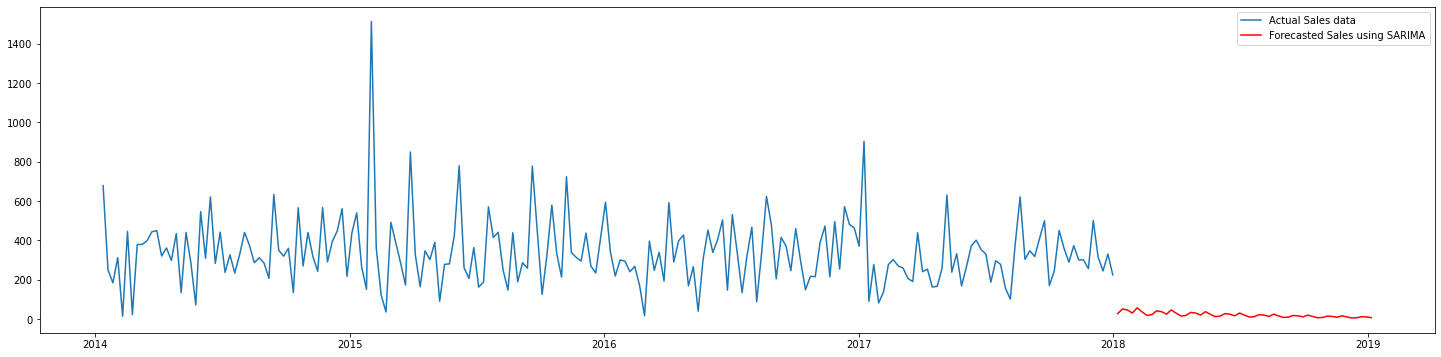

In [125]:
plt.figure(figsize=(25,6))

plt.plot(df2.Sales,label = 'Actual Sales data')
plt.plot(fcast_sarima,'r',label='Forecasted Sales using SARIMA')
plt.legend(loc='best')
plt.show()

## SARIMAX

In [94]:
df6 = df[['Order Date','Sales','Quantity','Profit','Discount']]
df6.shape

(2121, 5)

In [95]:
df6.head()

,Order Date,Sales,Quantity,Profit,Discount
0,2016-11-08,261.9600,2,41.9136,0.00
1,2016-11-08,731.9400,3,219.5820,0.00
3,2015-10-11,957.5775,5,-383.0310,0.45
5,2014-06-09,48.8600,7,14.1694,0.00
10,2014-06-09,1706.1840,9,85.3092,0.20


In [96]:
df6.dtypes

Order Date    datetime64[ns]
Sales                float64
Quantity               int64
Profit               float64
Discount             float64
dtype: object

In [97]:
# setting the index as Order Date
df6_1 = df6.set_index('Order Date')
df6_1.head(3)

,Sales,Quantity,Profit,Discount
Order Date,,,,
2016-11-08,261.9600,2,41.9136,0.00
2016-11-08,731.9400,3,219.5820,0.00
2015-10-11,957.5775,5,-383.0310,0.45


In [98]:
df6_1 = df6_1.resample('W').mean()

In [99]:
df6_1.head()

,Sales,Quantity,Profit,Discount
Order Date,,,,
2014-01-12,678.107000,3.750000,179.268750,0.150000
2014-01-19,250.094600,4.800000,-50.800880,0.310000
2014-01-26,183.995333,2.888889,39.514033,0.022222
2014-02-02,311.833000,2.500000,-6.615200,0.175000
2014-02-09,14.560000,2.000000,5.532800,0.000000


In [100]:
# hexogeneous variables to forecast 'var'
num1 = int(0.7*len(df6_1))
train1 = df6_1.iloc[:num1]
test1 = df6_1.iloc[num1:]

In [101]:
exog_train = train1[['Quantity','Profit','Discount']]
exog_test = test1[['Quantity','Profit','Discount']]

In [126]:
model3 = SARIMAX(train1.Sales,order=(1,0,0),seasonal_order=(1,0,0,7),exog=exog_train).fit()

In [127]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Sales   No. Observations:                  145
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 7)   Log Likelihood                -946.954
Date:                           Sun, 13 Nov 2022   AIC                           1905.908
Time:                                   09:28:21   BIC                           1923.769
Sample:                               01-12-2014   HQIC                          1913.166
                                    - 10-16-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Quantity      94.0363      6.843     13.742      0.000      80.624     107.449
Profit        -0.3630      0.112     -3.236      0.001      -0.583      -0.143
Discount    -117.0601    159.757     -0.733      0.464    -430.177     196.057
ar.L1         -0.0869      0.104     -0.833      0.405      -0.291       0.118
ar.S.L7        0.1543      0.096      1.603      0.109      -0.034       0.343
sigma2      2.725e+04   2796.036      9.745      0.000    2.18e+04    3.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                89.03
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.90
Prob(H) (two-sided):                  0.63   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [128]:
import statsmodels.api as sm
pvalue = sm.stats.acorr_ljungbox(model3.resid,lags=[1],return_df=True)['lb_pvalue'].values

In [129]:
if pvalue <0.05:
    print('not good')
else:
    print('good')

good


In [130]:
AIC_SARIMAX = model3.aic
BIC_SARIMAX = model3.bic

In [131]:
#forecasted values for test data
pred_sarimax = model3.forecast(len(test1.Sales),exog = exog_test)
pred_sarimax

2016-10-23    299.438472
2016-10-30    412.918152
2016-11-06    389.353769
2016-11-13    322.043197
2016-11-20    279.343735
                 ...    
2017-12-03    426.384747
2017-12-10    365.268442
2017-12-17    267.132380
2017-12-24    301.021079
2017-12-31    288.703329
Freq: W-SUN, Name: predicted_mean, Length: 63, dtype: float64

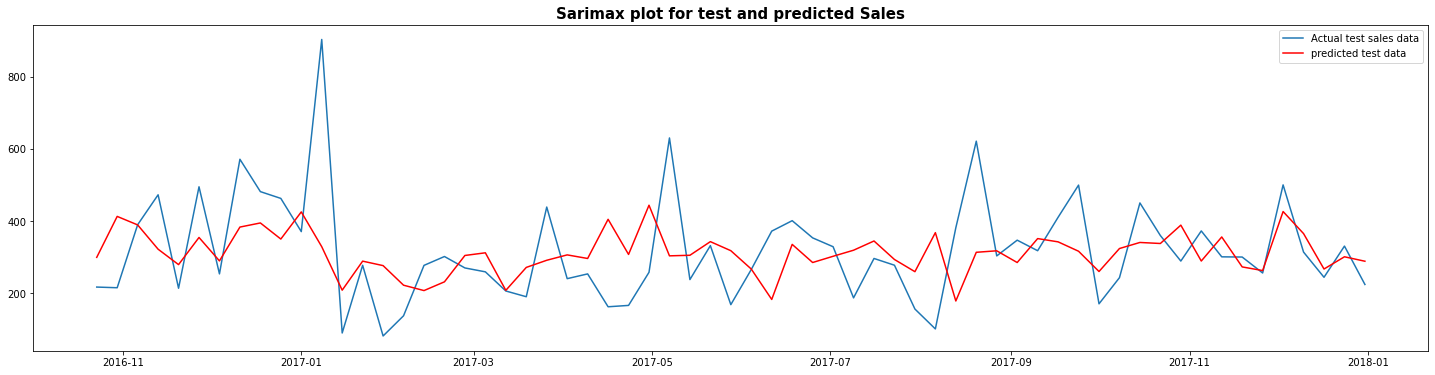

In [132]:
plt.figure(figsize=(25,6))

plt.plot(test1.Sales,label='Actual test sales data')
plt.plot(pred_sarimax,'r',label='predicted test data')
plt.legend(loc='best')
plt.title('Sarimax plot for test and predicted Sales',fontweight='bold',size=15)
plt.show()

In [133]:
#Evalution

mse_sarimax = mean_squared_error(test1.Sales,pred_sarimax)
rmse_sarimax = mean_squared_error(test1.Sales,pred_sarimax,squared=False)

print(mse_sarimax)
print(rmse_sarimax)

19444.599131388713
139.44389241335998


In [134]:
pred_sarimax1 =  model3.predict(len(test1.Sales)+52,exog = len(exog_test)+52)
pred_sarimax1

Order Date
2016-03-27    321.529766
2016-04-03    464.606224
2016-04-10    338.815607
2016-04-17    368.209376
2016-04-24    389.367433
2016-05-01    267.564042
2016-05-08    408.820108
2016-05-15    188.868690
2016-05-22    371.321501
2016-05-29    336.475394
2016-06-05    350.011315
2016-06-12    281.358370
2016-06-19    329.922249
2016-06-26    179.927196
2016-07-03    275.912519
2016-07-10    342.088899
2016-07-17    306.861284
2016-07-24    299.994784
2016-07-31    476.446618
2016-08-07    407.710703
2016-08-14    293.632705
2016-08-21    456.000792
2016-08-28    282.189891
2016-09-04    260.742103
2016-09-11    288.956337
2016-09-18    272.554999
2016-09-25    251.021424
2016-10-02    419.380678
2016-10-09    387.480718
2016-10-16    400.144625
Freq: W-SUN, Name: predicted_mean, dtype: float64

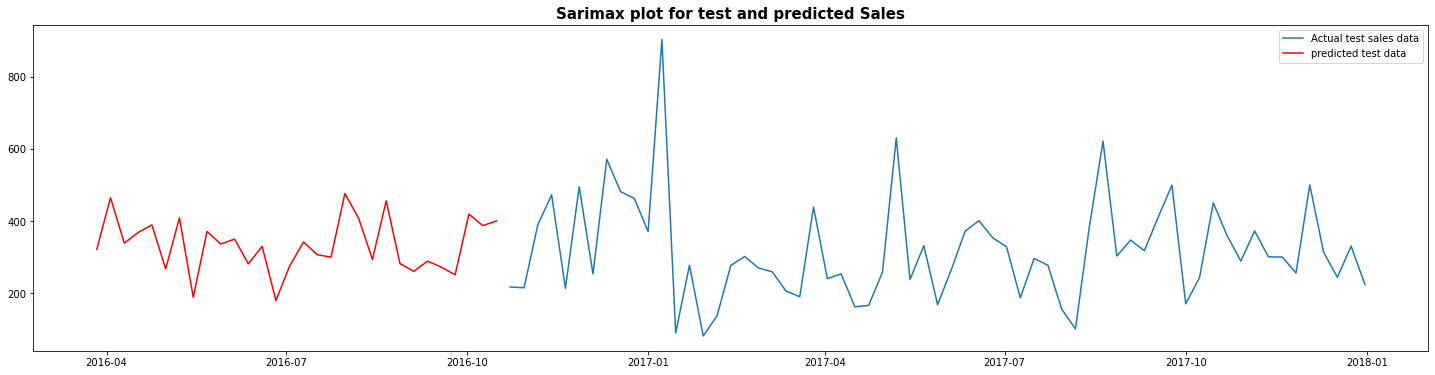

In [135]:
plt.figure(figsize=(25,6))

plt.plot(test1.Sales,label='Actual test sales data')
plt.plot(pred_sarimax1,'r',label='predicted test data')
plt.legend(loc='best')
plt.title('Sarimax plot for test and predicted Sales',fontweight='bold',size=15)
plt.show()

In [136]:
#Forecast  (fv = forecasted values)

sarimax_fv = model3.fittedvalues
sarimax_fv

Order Date
2014-01-12    270.002647
2014-01-19    398.060506
2014-01-26    270.656315
2014-02-02    223.156112
2014-02-09    177.782430
                 ...    
2016-09-18    272.554999
2016-09-25    251.021424
2016-10-02    419.380678
2016-10-09    387.480718
2016-10-16    400.144625
Freq: W-SUN, Length: 145, dtype: float64

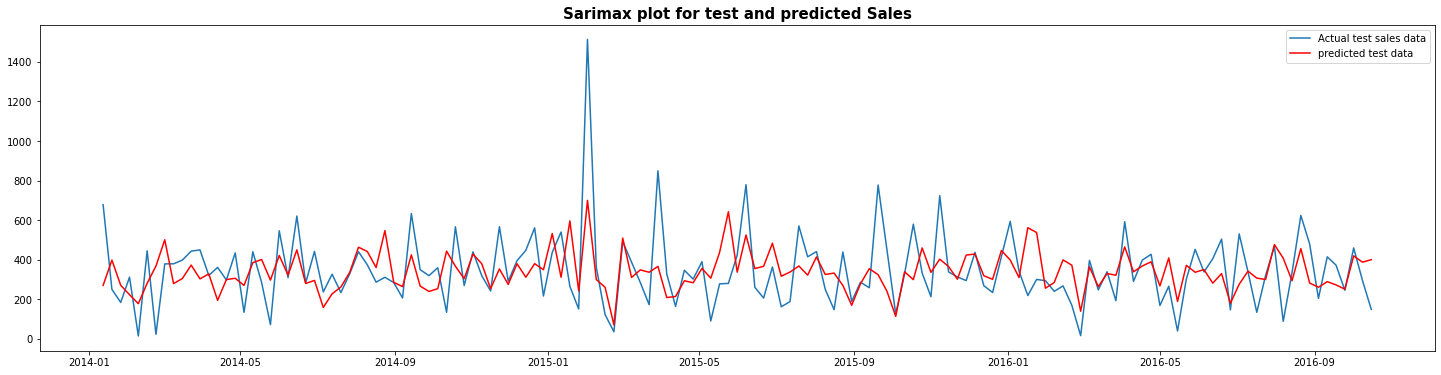

In [137]:
plt.figure(figsize=(25,6))

plt.plot(train1.Sales,label='Actual test sales data')
plt.plot(sarimax_fv,'r',label='predicted test data')
plt.legend(loc='best')
plt.title('Sarimax plot for test and predicted Sales',fontweight='bold',size=15)
plt.show()

## Final plot for all models:-

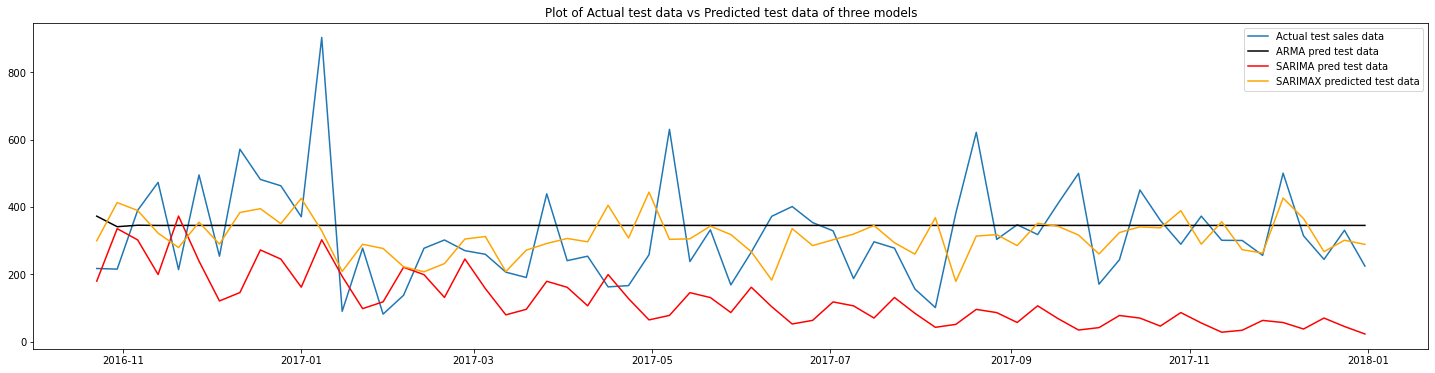

In [138]:
plt.figure(figsize=(25,6))

plt.plot(test.Sales,label='Actual test sales data')
plt.plot(pred_arma,'black',label='ARMA pred test data')
plt.plot(pred_sarima,'r',label='SARIMA pred test data')
plt.plot(pred_sarimax,'orange',label='SARIMAX predicted test data')
plt.title('Plot of Actual test data vs Predicted test data of three models')
plt.legend(loc='best')
plt.show()

In [115]:
v1 = pd.DataFrame({'ARMA':[AIC_ARMA,BIC_ARMA,mse_arma,rmse_arma],'SARIMA':[AIC_SARIMA,BIC_SARIMA,mse_sarima,rmse_sarima],
                  'SARIMAX':[AIC_SARIMAX,BIC_SARIMAX,mse_sarimax,rmse_sarimax]})
v1.index = ['AIC','BIC','MSE','RMSE']
v1

,ARMA,SARIMA,SARIMAX
AIC,1927.436320,2029.511347,1907.403437
BIC,1936.366522,2038.441548,1925.263839
MSE,21205.460409,103544.003482,19112.557486
RMSE,145.620948,321.782541,138.248174


## Interpretations:-
       * The best model for predictions is 'SARIMAX' with less AIC,BIC and RMSE values.
       * By Sarimax model the  Predicted values are also nearer to the actual test values.